In [15]:
%matplotlib notebook

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [19]:
dataset = datasets.load_digits()

In [20]:
data = dataset['images']
labels = dataset['target']

In [21]:
data.shape

(1797, 8, 8)

In [22]:
labels.shape

(1797,)

In [23]:
n, h, w = data.shape

In [24]:
pca = PCA(n_components=2)

In [25]:
z = pca.fit_transform(data.reshape((n, h * w)))

In [26]:
z.shape

(1797, 2)

In [27]:
x = z[:, 0]
y = z[:, 1]

<IPython.core.display.Javascript object>


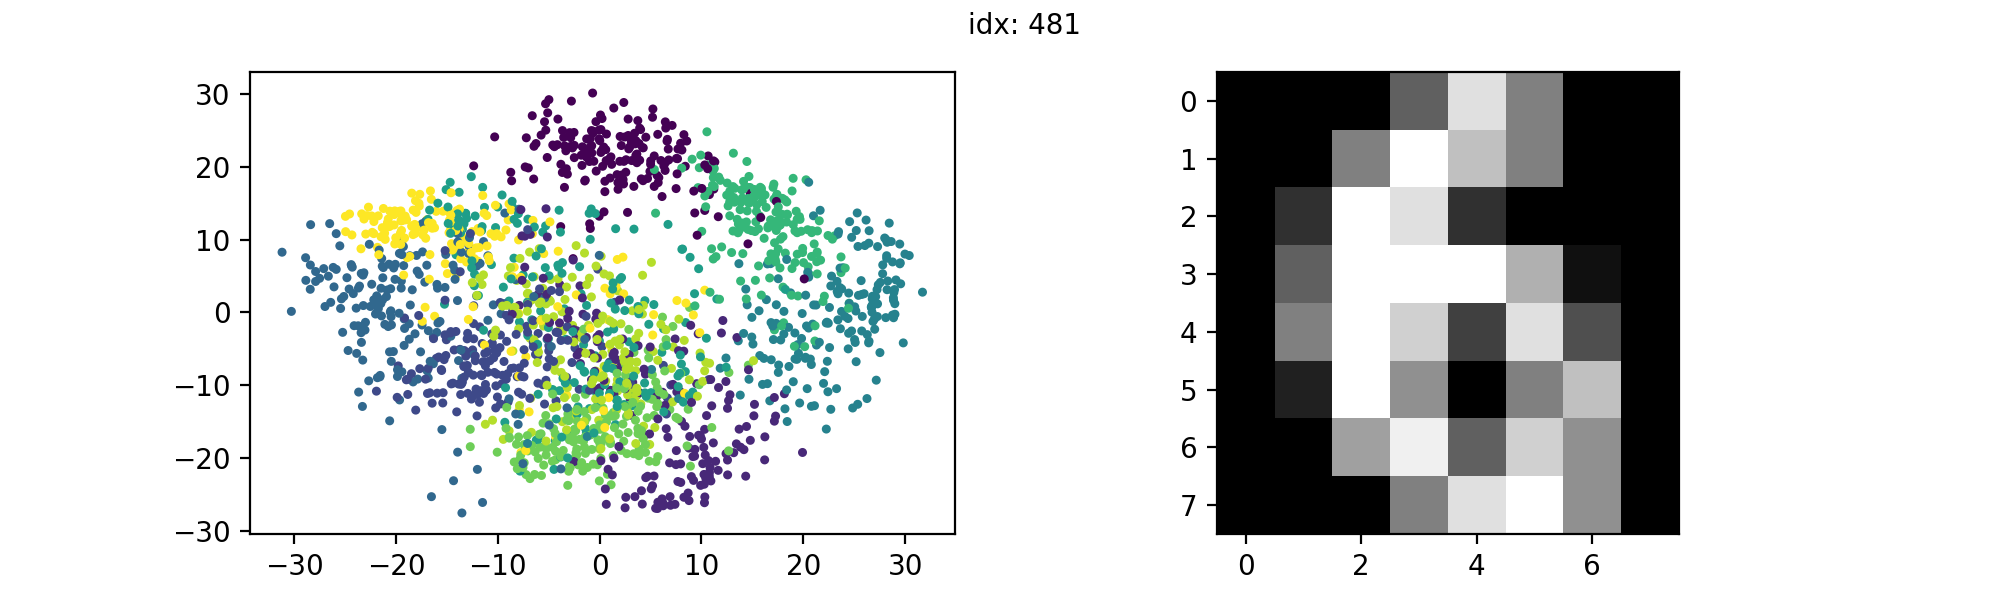

In [28]:
%matplotlib notebook

def debug(tx):
    debug_text.set_text(tx)

def mse(array, value):
    return np.sum(np.square(array - value), axis=1)
    
def find_nearest(array, value, tol=0.0):
    array = np.asarray(array)
    test_tol = mse(array, value).min()
    if test_tol < tol:
        idx = mse(array, value).argmin()
        return idx, test_tol
    else:
        return None, test_tol
    
def button_press_event(event):
    tol = 1.0
    clicked_coord = np.array([event.xdata, event.ydata])
    find_nearest(z, clicked_coord, tol)
    dataind, test_tol = find_nearest(z, clicked_coord, tol)
    #debug('dbg: %.2f<%.2f, idx: %s' % (test_tol, tol, str(dataind)))
    debug('idx: %s' % str(dataind))
    if dataind is not None:
        axi = fig.add_subplot(122)
        axi.imshow(data[dataind, :, :], cmap='gray')
    return True

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(121)
ax.scatter(x, y, s=5, c=labels)
#debug_text = ax.text(0, 0, "", va="bottom", ha="left")
debug_text = ax.text(1.1, 1.1,'', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
cid = fig.canvas.mpl_connect('button_press_event', button_press_event)